In [1]:
import pandas as pd
file_path = "train.csv"

df = pd.read_csv(file_path)

X = df['comment_text']
y = df['toxic']

In [8]:
toxic_ratio = df['toxic'].mean()
print(f"Toxic ratio: {toxic_ratio:.2%}")

Toxic ratio: 9.58%


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# pipeline: TF-IDF vectorizer + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 2),
        stop_words='english'
    )),
    ('clf', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

In [4]:
pipeline.fit(X_train, y_train)

y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

y_pred = (y_pred_proba >= 0.5).astype(int)

print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred_proba))
print("PR AUC:", average_precision_score(y_val, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     28856
           1       0.60      0.86      0.71      3059

    accuracy                           0.93     31915
   macro avg       0.79      0.90      0.84     31915
weighted avg       0.95      0.93      0.94     31915

ROC AUC: 0.9668809016882923
PR AUC: 0.8510829671751698


In [5]:
import joblib

joblib.dump(pipeline, "toxic_comment_classifier.pkl")

['toxic_comment_classifier.pkl']

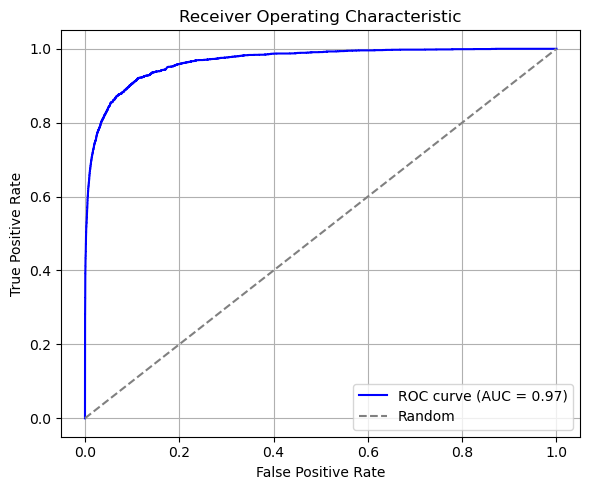

In [6]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# predict probabilities
y_scores = pipeline.predict_proba(X_val)[:, 1]

# get ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


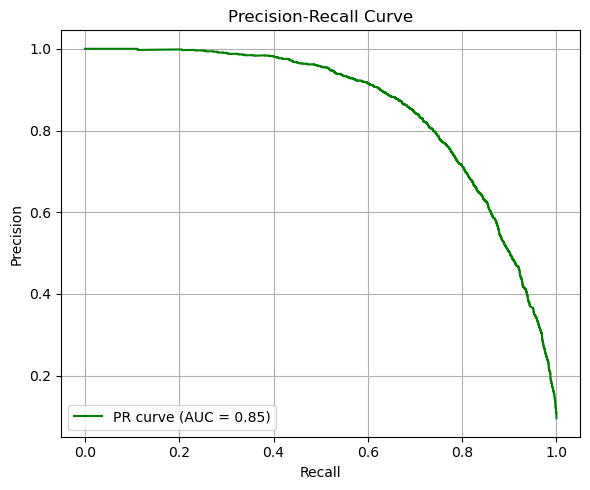

In [7]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_val, y_scores)
pr_auc = average_precision_score(y_val, y_scores)

# plot PR curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.2f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()
